<a href="https://colab.research.google.com/github/samia-75-shahid/Assignment_3-login-php/blob/main/weedproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix # Make sure to import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
# ... (rest of your code)

In [80]:
# Set path to your dataset
base_dir = '/content/drive/MyDrive/WeedCrop.v1i.yolov5pytorch'  # Update this path
train_dir = os.path.join(base_dir, '/content/drive/MyDrive/WeedCrop.v1i.yolov5pytorch/train')
test_dir = os.path.join(base_dir, '/content/drive/MyDrive/WeedCrop.v1i.yolov5pytorch/test')

In [81]:
# Parameters
IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 3

In [82]:
# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [83]:
# Create generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory( # Redefining test_generator here
    test_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False  # Important to set shuffle to False for evaluation
)

Found 2469 images belonging to 2 classes.
Found 118 images belonging to 2 classes.


In [84]:
# Check what classes we have
print("\nFound classes:")
print(train_generator.class_indices)
target_names = list(train_generator.class_indices.keys())
print("Using these target names:", target_names)


Found classes:
{'images': 0, 'labels': 1}
Using these target names: ['images', 'labels']


In [85]:
# Load base model
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model.trainable = False

In [86]:
# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
predictions = Dense(len(target_names), activation='softmax')(x)  # Dynamic number of classes

model = Model(inputs=base_model.input, outputs=predictions)

In [87]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [88]:
# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2)


In [89]:
# Train the model
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=EPOCHS,
    callbacks=[early_stop, lr_reduce]
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3
78/78 ━━━━━━━━━━━━━━━━━━━━ 464s 6s/step - accuracy: 0.8164 - loss: 0.3165 - val_accuracy: 1.0000 - val_loss: 0.0079 - learning_rate: 5.0000e-04
Epoch 2/3
78/78 ━━━━━━━━━━━━━━━━━━━━ 358s 4s/step - accuracy: 1.0000 - loss: 0.0083 - val_accuracy: 1.0000 - val_loss: 0.0036 - learning_rate: 5.0000e-04
Epoch 3/3
78/78 ━━━━━━━━━━━━━━━━━━━━ 252s 3s/step - accuracy: 1.0000 - loss: 0.0041 - val_accuracy: 1.0000 - val_loss: 0.0021 - learning_rate: 5.0000e-04


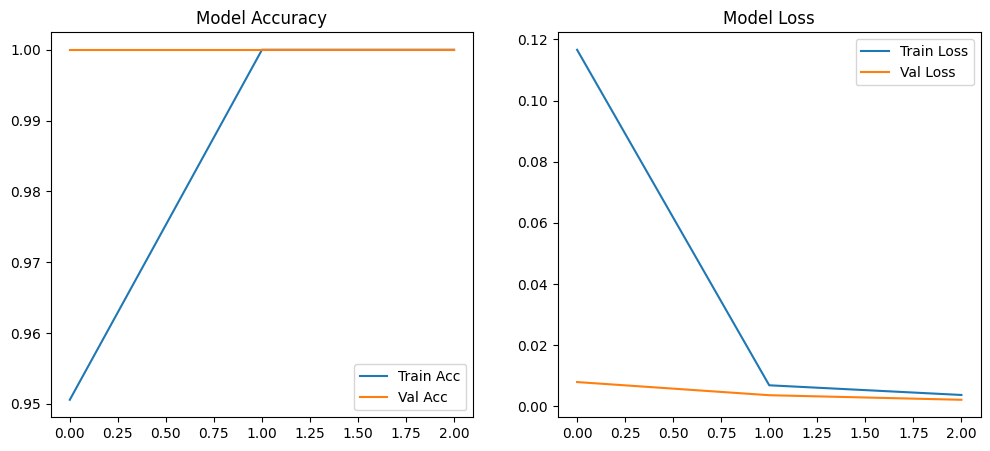

In [90]:

# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

In [91]:
# Evaluation and Confusion Matrix
Y_pred = model.predict(test_generator) # Now test_generator is defined
y_pred = np.argmax(Y_pred, axis=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 26s 5s/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


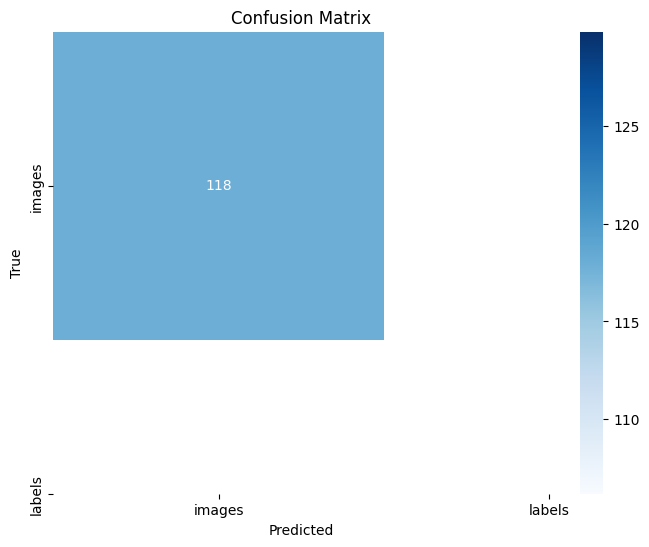

In [92]:
# Now you can generate the confusion matrix
cm = confusion_matrix(test_generator.classes, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

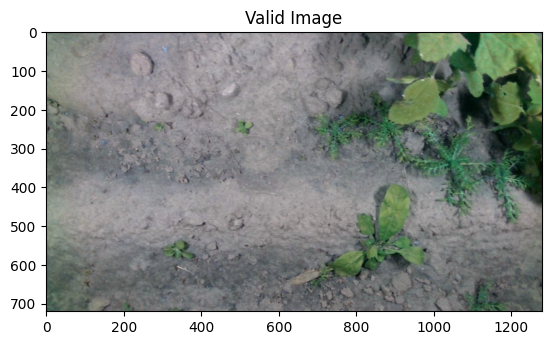

In [93]:
import cv2
import matplotlib.pyplot as plt # Import the matplotlib library

image_path = "/content/drive/MyDrive/WeedCrop.v1i.yolov5pytorch/valid/images/12120_jpg.rf.e2bf8a5eb2db67d77be7d32085df22bb.jpg"
img = cv2.imread(image_path)
plt.imshow(img)
plt.title("Valid Image")
plt.show()

In [94]:
# Now you can get the result index
result_index = np.argmax(image_prediction)
print(result_index)

1


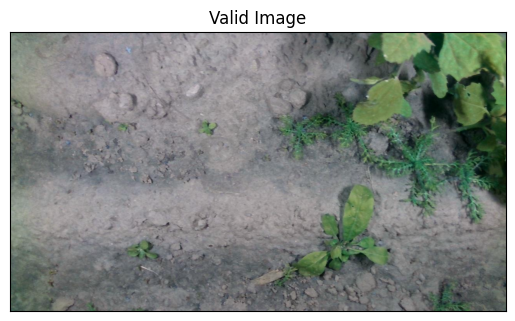

In [96]:
# Displaying the image
plt.imshow(img)
plt.title('Valid Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [97]:
#Single image Prediction
print("It's a {}".format(target_names[result_index])) # Use target_names instead of test_set.class_names

It's a labels
